In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
import pandas as pd 
import numpy as np 

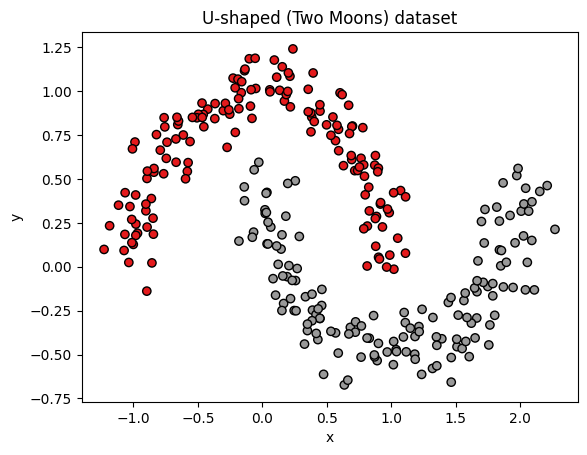

In [38]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate U-shaped data
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("x")
plt.ylabel("y")
plt.title("U-shaped (Two Moons) dataset")
plt.show()


In [16]:
df.head()


,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [19]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # disable GPU


2025-09-30 13:06:20.642398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759237580.939045      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759237581.023869      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # disable GPU


In [22]:
model = Sequential()
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
#set weighsts to 0 
initial_weights = model.get_weights()

In [26]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [27]:
model.set_weights(initial_weights)

In [28]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [32]:
history = model.fit(X,y,epochs = 100 , validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5382 - loss: 0.6932 - val_accuracy: 0.5167 - val_loss: 0.6931
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5247 - loss: 0.6931 - val_accuracy: 0.5167 - val_loss: 0.6931
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5018 - loss: 0.6931 - val_accuracy: 0.4833 - val_loss: 0.6931
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.4833 - val_loss: 0.6932
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4713 - loss: 0.6932 - val_accuracy: 0.4833 - val_loss: 0.6932
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4816 - loss: 0.6932 - val_accuracy: 0.4833 - val_loss: 0.6932
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5191 - loss: 0.6931 - val_accuracy: 0.4833 - val_loss: 0.6932
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5095 - loss: 0.6931 - val_accuracy: 0.4833 - val_loss:

In [33]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.01416294], dtype=float32)]

In [ ]:
# jaise weights the vaise hi hain their is no change in model model is performing teribble

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

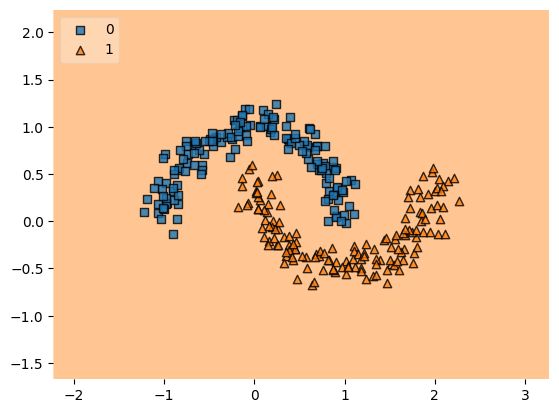

In [35]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X,y.astype('int'),clf=model , legend =2)

In [36]:
# after using relu and tanh their no change in the boundary 

# zero initialzation with sigmoid 

In [57]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10,activation="sigmoid",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
#set weighsts to 0 
initial_weights = model.get_weights()
#set weighsts to 0 
initial_weights = model.get_weights()
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
model.set_weights(initial_weights)

In [59]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [60]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

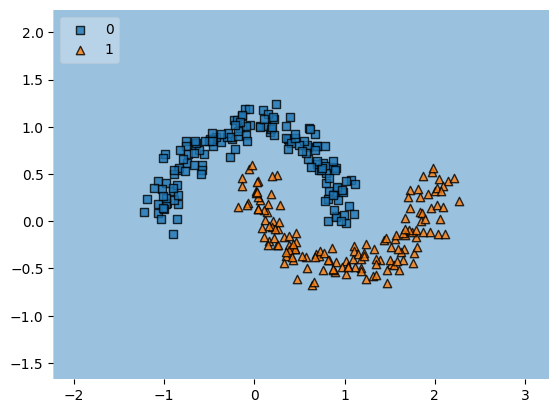

In [61]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X,y.astype('int'),clf=model , legend =2)

In [62]:

history = model.fit(X,y,epochs = 100 , validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.4833 - val_loss: 0.6935
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5359 - loss: 0.6924 - val_accuracy: 0.4833 - val_loss: 0.6936
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5412 - loss: 0.6921 - val_accuracy: 0.4833 - val_loss: 0.6935
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4784 - loss: 0.6936 - val_accuracy: 0.4833 - val_loss: 0.6933
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5042 - loss: 0.6931 - val_accuracy: 0.4833 - val_loss: 0.6933
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4780 - loss: 0.6933 - val_accuracy: 0.4833 - val_loss: 0.6933
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5162 - loss: 0.6928 - val_accuracy: 0.4833 - val_loss: 0.6934
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5219 - loss: 0.6924 - val_accuracy: 0.4833 - val_loss:

In [63]:
model.get_weights()

[array([[ 0.99700433,  0.99700433,  0.99700433,  0.99700433,  0.99700433,
          0.99700433,  0.99700433,  0.99700433,  0.99700433,  0.99700433],
        [-1.2360939 , -1.2360939 , -1.2360939 , -1.2360939 , -1.2360939 ,
         -1.2360939 , -1.2360939 , -1.2360939 , -1.2360939 , -1.2360939 ]],
       dtype=float32),
 array([-0.7006403, -0.7006403, -0.7006403, -0.7006403, -0.7006403,
        -0.7006403, -0.7006403, -0.7006403, -0.7006403, -0.7006403],
       dtype=float32),
 array([[0.26254275],
        [0.26254275],
        [0.26254275],
        [0.26254275],
        [0.26254275],
        [0.26254275],
        [0.26254275],
        [0.26254275],
        [0.26254275],
        [0.26254275]], dtype=float32),
 array([-0.5360272], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

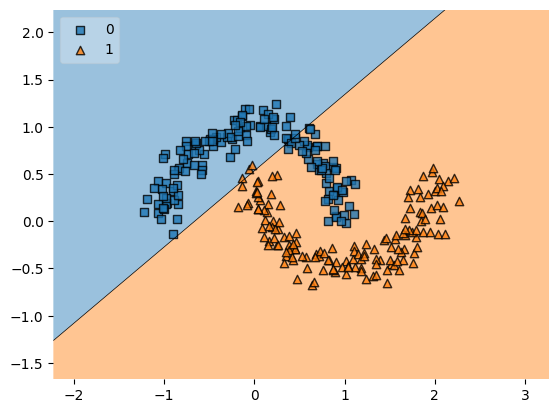

In [64]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X,y.astype('int'),clf=model , legend =2)

In [65]:
# same weights 

# non zero constant value  

In [67]:
xx

model = Sequential()
model.add(Dense(2,activation="relu",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [76]:
#set weighsts to 0 
initial_weights = model.get_weights()
#set weighsts to 0 
initial_weights = model.get_weights()
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5
model.set_weights(initial_weights)

In [77]:
model.set_weights(initial_weights)

In [78]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [79]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [80]:

history = model.fit(X,y,epochs = 100 , validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5296 - loss: 2.2100 - val_accuracy: 0.4833 - val_loss: 2.2926
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5306 - loss: 2.1101 - val_accuracy: 0.4833 - val_loss: 2.2283
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4888 - loss: 2.1958 - val_accuracy: 0.4833 - val_loss: 2.1656
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5155 - loss: 2.0950 - val_accuracy: 0.4833 - val_loss: 2.1054
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5280 - loss: 2.0010 - val_accuracy: 0.4833 - val_loss: 2.0462
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5037 - loss: 1.9566 - val_accuracy: 0.4833 - val_loss: 1.9886
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5156 - loss: 1.8476 - val_accuracy: 0.4833 - val_loss: 1.9323
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5063 - loss: 1.7839 - val_accuracy: 0.4833 - val_loss:

In [81]:
model.get_weights()


[array([[0.44178125, 0.44178125, 0.44178125, 0.44178125, 0.44178125,
         0.44178125, 0.44178125, 0.44178125, 0.44178125, 0.44178125],
        [0.03979534, 0.03979534, 0.03979534, 0.03979534, 0.03979534,
         0.03979534, 0.03979534, 0.03979534, 0.03979534, 0.03979534]],
       dtype=float32),
 array([0.15673971, 0.15673971, 0.15673971, 0.15673971, 0.15673971,
        0.15673971, 0.15673971, 0.15673971, 0.15673971, 0.15673971],
       dtype=float32),
 array([[0.14658734],
        [0.14658734],
        [0.14658734],
        [0.14658734],
        [0.14658734],
        [0.14658734],
        [0.14658734],
        [0.14658734],
        [0.14658734],
        [0.14658734]], dtype=float32),
 array([-0.05752258], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

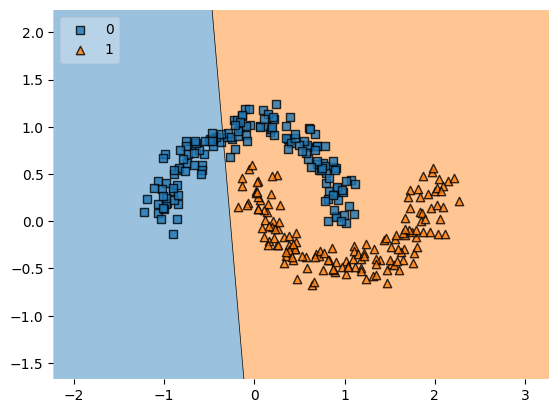

In [82]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X,y.astype('int'),clf=model , legend =2)

In [ ]:
# now we understand w cannot initiliaze values with and non zero constant 

In [ ]:
#now do by random initialzation

In [83]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [87]:
model.add(Dense(2,activation="tanh",input_dim = 2))
model.add(Dense(2,activation="tanh"))
model.add(Dense(2,activation="tanh"))
model.add(Dense(2,activation="tanh"))
model.add(Dense(2,activation="sigmoid"))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (856.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)